In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

dp = lambda x: datetime.strptime(x, '%Y-%m-%d')

aus = pd.read_csv('australia.csv', index_col='date', parse_dates=True, date_parser=dp)
fra = pd.read_csv('france.csv', index_col='date', parse_dates=True, date_parser=dp)
pol = pd.read_csv('poland.csv', index_col='date', parse_dates=True, date_parser=dp)

# aus['date'] = pd.to_datetime(aus['date'], format='%Y-%m-%d')
# fra['date'] = pd.to_datetime(fra['date'], format='%Y-%m-%d')
# pol['date'] = pd.to_datetime(pol['date'], format='%Y-%m-%d')

# timeseriesUS = pd.Series(jobseekers['% US based jobseekers looking for jobs in US'].values, index=jobseekers['time'])

I experimented with using a rolling mean for each timeseries above for better visualisation, but I found that any window value that was useful in producing a nicer visualisation resulted in the data not being well represented, and anomalies skewing the data too much.

Retail and recreation minimum mobility date: 2020-04-10 00:00:00
Grocery and pharmacy minimum mobility date:  2020-04-10 00:00:00
Parks minimum mobility date:                 2020-04-04 00:00:00
Transit minimum mobility date:               2020-04-10 00:00:00
Workplaces minimum mobility date:            2020-04-10 00:00:00
Residential MAXIMUM mobility date:           2020-04-10 00:00:00


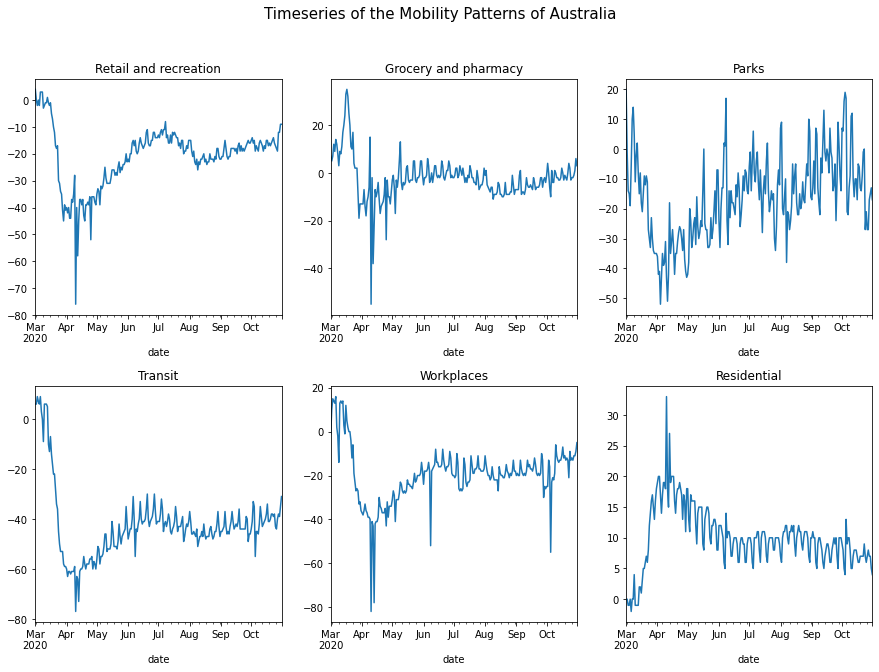

In [2]:
aus_retail_timeseries = pd.Series(aus['retail_and_recreation_percent_change_from_baseline'].values, index=aus.index)
aus_grocery_timeseries = retail_series = pd.Series(aus['grocery_and_pharmacy_percent_change_from_baseline'].values, index=aus.index)
aus_parks_timeseries = retail_series = pd.Series(aus['parks_percent_change_from_baseline'].values, index=aus.index)
aus_trainsit_timeseries = retail_series = pd.Series(aus['transit_stations_percent_change_from_baseline'].values, index=aus.index)
aus_workplaces_timeseries = retail_series = pd.Series(aus['workplaces_percent_change_from_baseline'].values, index=aus.index)
aus_residential_timeseries = retail_series = pd.Series(aus['residential_percent_change_from_baseline'].values, index=aus.index)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

aus_retail_timeseries.plot(ax=axes[0,0])
aus_grocery_timeseries.plot(ax=axes[0,1])
aus_parks_timeseries.plot(ax=axes[0,2])
aus_trainsit_timeseries.plot(ax=axes[1,0])
aus_workplaces_timeseries.plot(ax=axes[1,1])
aus_residential_timeseries.plot(ax=axes[1,2])

fig.suptitle('Timeseries of the Mobility Patterns of Australia', fontsize=15)
axes[0,0].set_title('Retail and recreation')
axes[0,1].set_title('Grocery and pharmacy')
axes[0,2].set_title('Parks')
axes[1,0].set_title('Transit')
axes[1,1].set_title('Workplaces')
axes[1,2].set_title('Residential')

plt.subplots_adjust(hspace=0.3)

print('Retail and recreation minimum mobility date: '+str(aus_retail_timeseries.idxmin()))      #min date
print('Grocery and pharmacy minimum mobility date:  '+str(aus_grocery_timeseries.idxmin()))     #min date
print('Parks minimum mobility date:                 '+str(aus_parks_timeseries.idxmin()))       #min date
print('Transit minimum mobility date:               '+str(aus_trainsit_timeseries.idxmin()))    #min date
print('Workplaces minimum mobility date:            '+str(aus_workplaces_timeseries.idxmin()))  #min date
print('Residential MAXIMUM mobility date:           '+str(aus_residential_timeseries.idxmax())) #max date

__Retail and recreation__ mobility took a large dip in mid-March to -40% by the end of March and began to level out at the end of May, with a breif large spike on the 10th of April, before leveling out again and then beginning to rise in May at a constant rate until it was up to -10% in July, when it dipped constantly again to nearly -30% in mid-August. From here it slowly constantly rose to about -15%.

__Grocery and pharmacy__ mobility shot up in mid-March, to about 35%. This is likely due to 'panic buying'. At the beginning of the pandemic many people were stocking up on groceries and toilet paper out of fear that shops would close, or so they wouldn't have to go out as much. This quickly falls off at the end of March and comes to about 20%. Similarly to retail and recreation there is a large spike on the 10th of April to -60%, however for the rest of the timeline the data is relatively constant and does not fall below -20% again, even returning to 0 a few time over summer. This is because grocery and pharmacy demands are the same as before the pandamic, and are neccesarry for everybody.

__Parks__: The mobility in parks_fell sharply and hit an all-pandemic-time low at the beginning of April of -50% from the baseline. This then rose relatively constantly to be between 0% and -10% by July. The park mobility data is quite erratic throughout the whole timeline, likely because unlike residences or workplaces, most people don't typically go to parks on a daily or regular basis, and the daily weather conditions can effect the amount of people moving through parks.

__Transit__ mobility dips in mid-March, as all the previous graphs have due to the beginning of the pandemic, to -60% by the end of March. There's a couple quick dips in the first half of April and then the transit mobility slowly rises back to about -40% to -30% in July. It slowly falls again after July to -50% in mid-August, and then rises back up to -40% in November.

__Workplaces__: The mobility in workplaces drops in mid-March to about -40% by the end of March, with a one day low of -80% on the 10th of April. For the most part it then steadily rises to about -10% in mid-June. From here it dips a bit and averages roughly -20% for the rest of the pandemic, with a couple of sharp, deep troughs in early June and early October, likely due to public holidays.

__Residential__ mobility, unlike the other mobility data, goes up from mid-March as of course if people aren't out at work and other activities they're going to be at home. It peaks in early April at nearly 35% on the 10th of April, but for the most part it maxes out at 20%. It slowly falls to 10% by mid June, crawls up to 12% in August, and trends down to 6% by November.

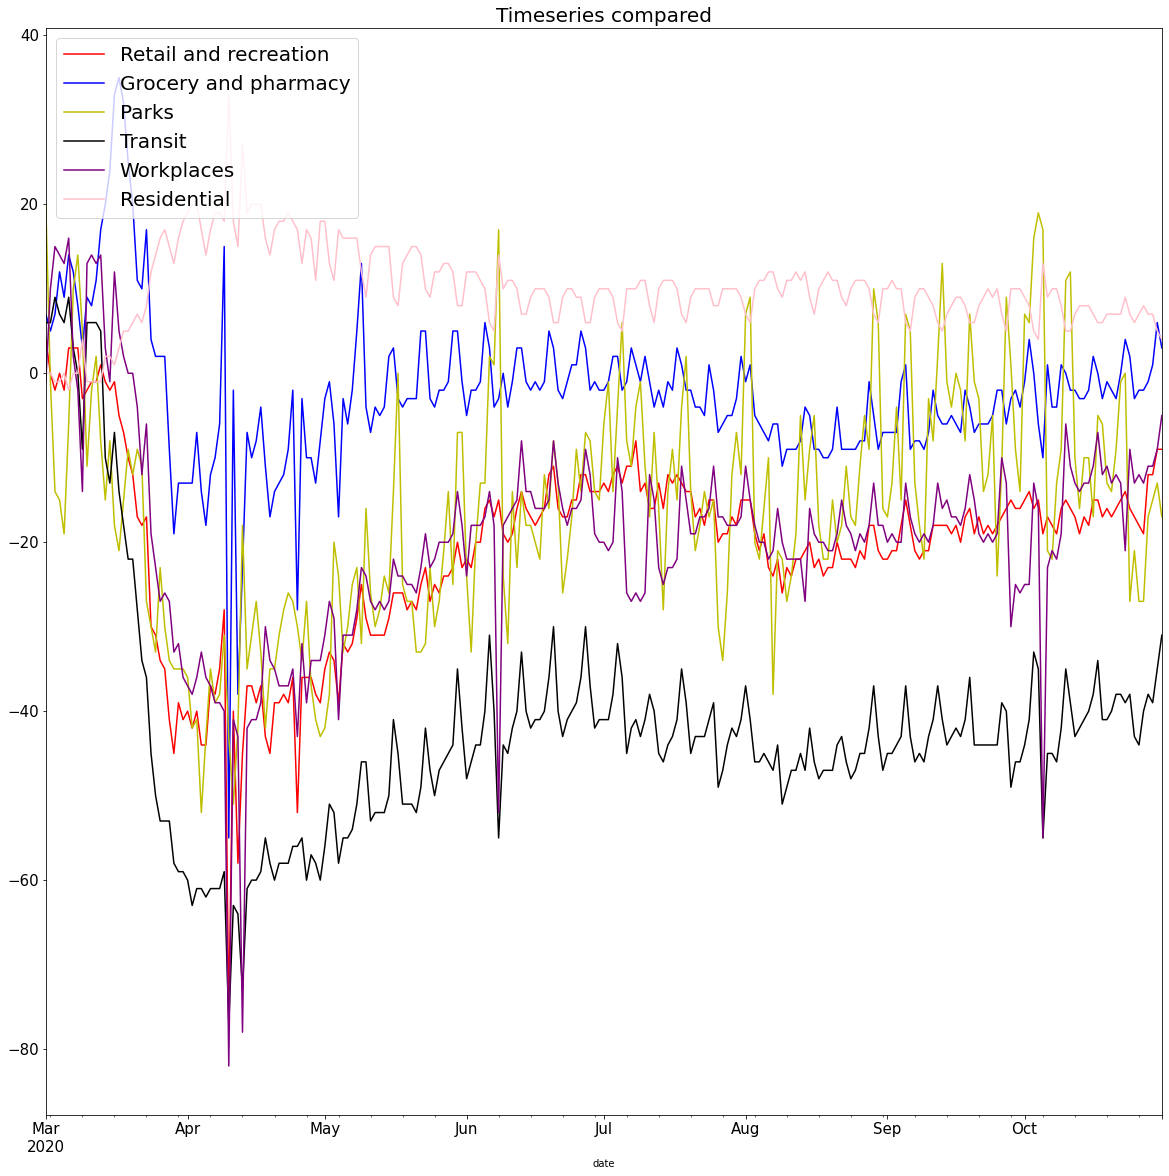

In [3]:
aus_retail_timeseries.plot(figsize=(20,20), color='r', label='Retail and recreation', fontsize=15)
aus_grocery_timeseries.plot(color='b', label='Grocery and pharmacy')
aus_parks_timeseries.plot(color='y', label='Parks')
aus_trainsit_timeseries.plot(color='black', label='Transit')
aus_workplaces_timeseries.plot(color='purple', label='Workplaces')
aus_residential_timeseries.plot(color='pink', label='Residential')

plt.title('Timeseries compared', fontsize=20)

plt.legend(loc="upper left", prop={'size': 20})

plt.subplots_adjust(hspace=0.3)

As you can see the most effected mobility is transit mobility, as the black line is as far from 0% on average than any other. The least effected mobility is grocery and pharmacy mobility, as the blue line is as close to 0% on average than any other line. The mobility data for retail and recreation (red), parks (yellow) and workplaces (purple) follow each other quite closely, except for the fact that the Parks mobility data is extremely erratic, much moreso than any other set of mobility data. For the most part all the mobility data follows a similar trend, when each one dips and spikes all the others follow the same shape, except for Residential which naturally follows the opposite shape, except from July. From July onwards you see the mobility dip in all other categories and then rise again, whilst Residential remains relatively the same. Another noticeable comparison is that almost every catagory as a breif large trough on the 10th of April (and a brief spike is observed for residential, though it is not as pronounced as the other data). Through research I could not find out why the 10th of April in particular caused mobility data to drop overall, so I assume it's simply an anomalous result.

Retail and recreation minimum mobility date: 2020-04-13 00:00:00
Grocery and pharmacy minimum mobility date:  2020-05-01 00:00:00
Parks minimum mobility date:                 2020-03-29 00:00:00
Transit minimum mobility date:               2020-04-13 00:00:00
Workplaces minimum mobility date:            2020-04-13 00:00:00
Residential MAXIMUM mobility date:           2020-05-01 00:00:00


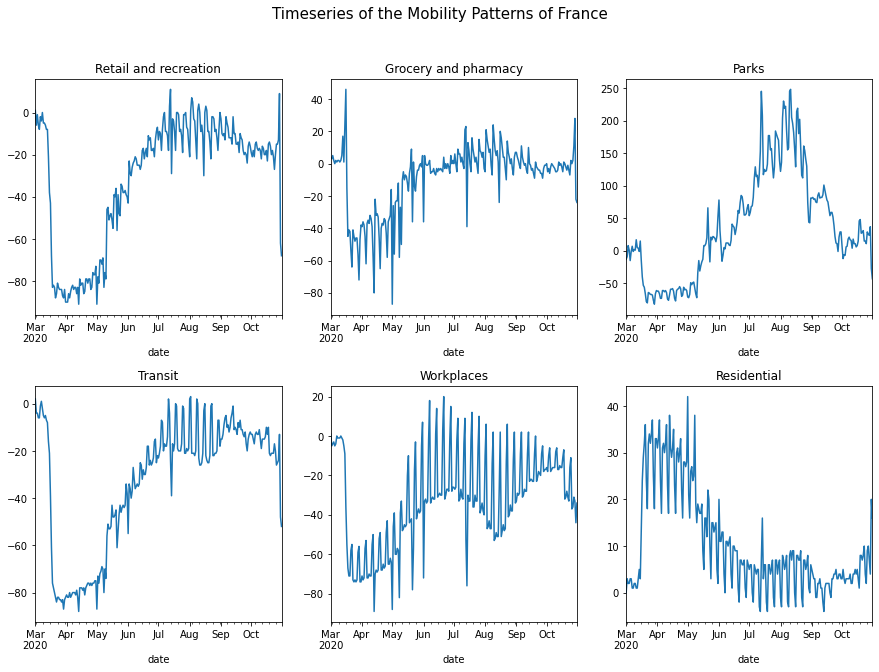

In [4]:
fra_retail_timeseries = pd.Series(fra['retail_and_recreation_percent_change_from_baseline'].values, index=fra.index)
fra_grocery_timeseries = retail_series = pd.Series(fra['grocery_and_pharmacy_percent_change_from_baseline'].values, index=fra.index)
fra_parks_timeseries = retail_series = pd.Series(fra['parks_percent_change_from_baseline'].values, index=fra.index)
fra_trainsit_timeseries = retail_series = pd.Series(fra['transit_stations_percent_change_from_baseline'].values, index=fra.index)
fra_workplaces_timeseries = retail_series = pd.Series(fra['workplaces_percent_change_from_baseline'].values, index=fra.index)
fra_residential_timeseries = retail_series = pd.Series(fra['residential_percent_change_from_baseline'].values, index=fra.index)


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

fra_retail_timeseries.plot(ax=axes[0,0])
fra_grocery_timeseries.plot(ax=axes[0,1])
fra_parks_timeseries.plot(ax=axes[0,2])
fra_trainsit_timeseries.plot(ax=axes[1,0])
fra_workplaces_timeseries.plot(ax=axes[1,1])
fra_residential_timeseries.plot(ax=axes[1,2])


fig.suptitle('Timeseries of the Mobility Patterns of France', fontsize=15)
axes[0,0].set_title('Retail and recreation')
axes[0,1].set_title('Grocery and pharmacy')
axes[0,2].set_title('Parks')
axes[1,0].set_title('Transit')
axes[1,1].set_title('Workplaces')
axes[1,2].set_title('Residential')


plt.subplots_adjust(hspace=0.3)

print('Retail and recreation minimum mobility date: '+str(fra_retail_timeseries.idxmin()))      #min date
print('Grocery and pharmacy minimum mobility date:  '+str(fra_grocery_timeseries.idxmin()))     #min date
print('Parks minimum mobility date:                 '+str(fra_parks_timeseries.idxmin()))       #min date
print('Transit minimum mobility date:               '+str(fra_trainsit_timeseries.idxmin()))    #min date
print('Workplaces minimum mobility date:            '+str(fra_workplaces_timeseries.idxmin()))  #min date
print('Residential MAXIMUM mobility date:           '+str(fra_residential_timeseries.idxmax())) #max date

__Retail and recreation__ mobility took an immediate, sharp dip in mid-March to -80% within just days, and down more to -95% by the end of March. Aside from a couple sharp troughs it largely rises from April to early May to about -75%, and then jumps sharply to -50%. It increases constantly from June to early July to about -10% and levels off. Between July and the first half of September the data becomes much more erratic, with a much larger variance amongst the data, ranging from -30% and 10%. After September the mobility trends down to -20%, with a sharp increase to 10% by November followed by an immediate sharp dip to -70%. Unfortunately, it's impossible to know if this is anomalous data, as the data ends here.

__Grocery and pharmacy__ mobility shot up in mid-March, to about 40% for a very brief period of time. This is likely due to 'panic buying', however it is too short of a time to tell, and may just be due to anomalous data. This falls off immediately to -40% within a few days. The data from mid-March to mid-May is very erratic, with lots of sharp troughs. By mid May the mobility has increased to -20%, and slowly increases to 0%, the baseline, by July. From July to October the data averages around the baseline, but is erratic, ranging between -40% and 20%. In November there is a sharp increase to 25% and immediately dip to -20%, but there isn't enough data afterwards to draw insights from this.

__Parks__: From mid-March mobility in Parks fell quickly to about -75%, and didn't increase again until mid May when it returned to the baseline. There are some spikes from late May to July, up to 75%, however, more noteably in early July there is a sharp spike to 240%. After falling back to 125% it reaches back up to 240% mid-August. The explanation for this is that parks are much more popular in summer months. It would be reasonable to expect the mobility in Parks to increase with lockdown restrictions, as indoor gatherings are banned, however as we've seen Parks still dipped in mobility from mid-March to mid-May, so the large increase seems to correlate more with the summer season as opposed to lockdown.

__Transit__ mobility drops sharply in mid-March, to below -85%. It rises steadily to be just under -70% by mid-May, and then jumps to -50% within a few days. From here it rises steadily up to -20% in July. From July to September the data is erratic, jumping between -25% and 0%. There is a slight downwards trend from September to November, from -10% to -25%.

__Workplaces__: The mobility in workplaces drops in mid-March to about -40% by the end of March, with a one day low of -80% on the 4th of April. For the most part it then steadily rises to about -10% in mid-June. From here it dips a bit and averages roughly -20% for the rest of the pandemic, with a couple of sharp, deep troughs in early June and early October, likely due to public holidays.

__Residential__ mobility, unlike the other mobility data, goes up from mid-March as of course if people aren't out at work and other activities they're going to be at home. It peaks in early April at nearly 35% on the 4th of April, but for the most part it maxes out at 20%. It slowly falls to 10% by mid June, crawls up to 12% in August, and trends down to 6% by November.

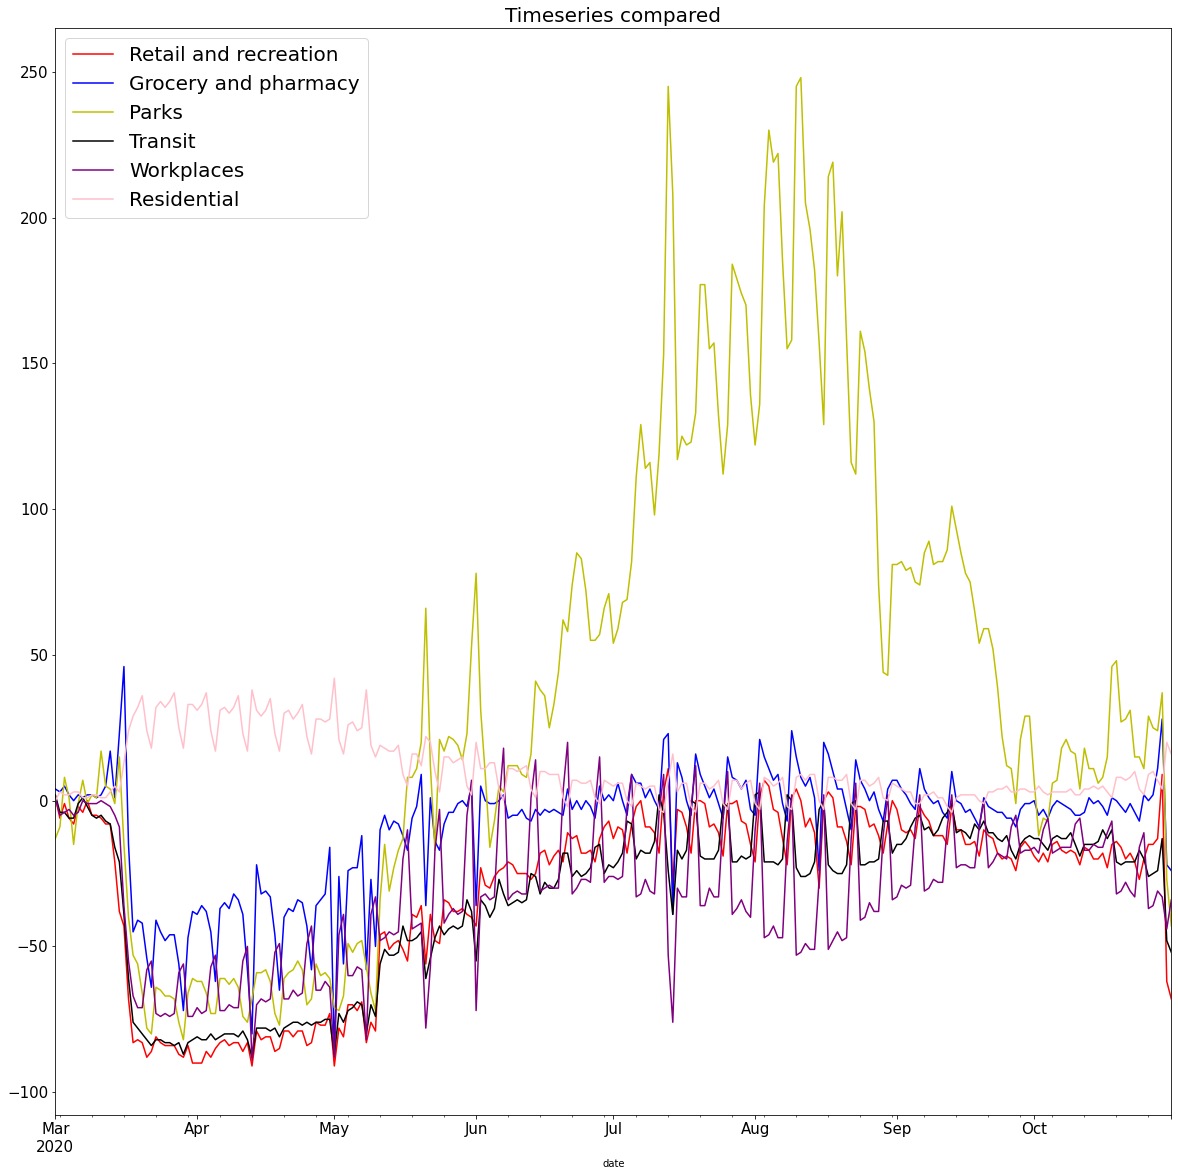

In [5]:
fra_retail_timeseries.plot(figsize=(20,20), color='r', label='Retail and recreation', fontsize=15)
fra_grocery_timeseries.plot(color='b', label='Grocery and pharmacy')
fra_parks_timeseries.plot(color='y', label='Parks')
fra_trainsit_timeseries.plot(color='black', label='Transit')
fra_workplaces_timeseries.plot(color='purple', label='Workplaces')
fra_residential_timeseries.plot(color='pink', label='Residential')

plt.title('Timeseries compared', fontsize=20)

plt.legend(loc="upper left", prop={'size': 20})

plt.subplots_adjust(hspace=0.3)

Retail and recreation minimum mobility date: 2020-04-13 00:00:00
Grocery and pharmacy minimum mobility date:  2020-04-13 00:00:00
Parks minimum mobility date:                 2020-04-13 00:00:00
Transit minimum mobility date:               2020-04-13 00:00:00
Workplaces minimum mobility date:            2020-04-13 00:00:00
Residential MAXIMUM mobility date:           2020-04-13 00:00:00


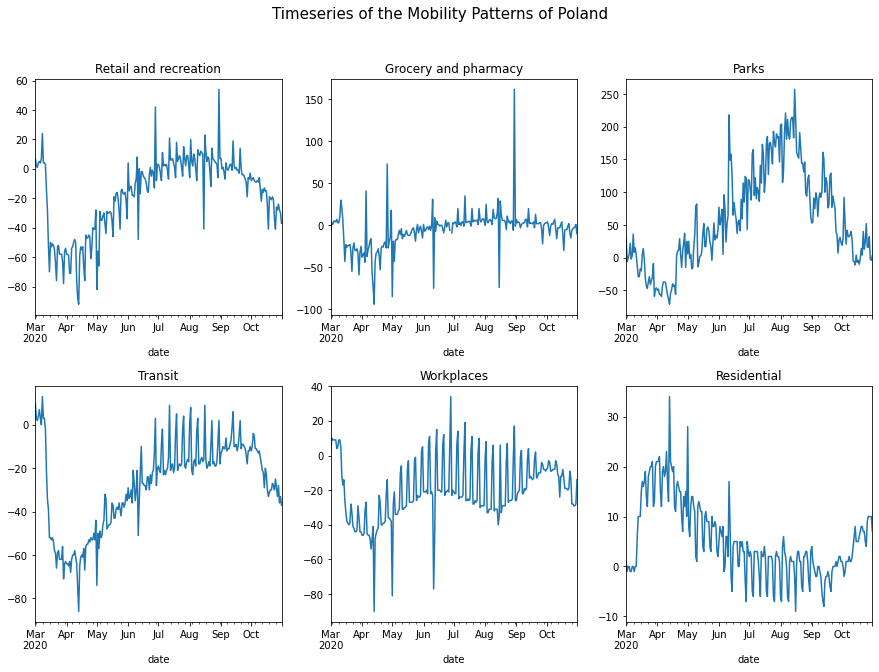

In [6]:
pol_retail_timeseries = pd.Series(pol['retail_and_recreation_percent_change_from_baseline'].values, index=pol.index)
pol_grocery_timeseries = retail_series = pd.Series(pol['grocery_and_pharmacy_percent_change_from_baseline'].values, index=pol.index)
pol_parks_timeseries = retail_series = pd.Series(pol['parks_percent_change_from_baseline'].values, index=pol.index)
pol_trainsit_timeseries = retail_series = pd.Series(pol['transit_stations_percent_change_from_baseline'].values, index=pol.index)
pol_workplaces_timeseries = retail_series = pd.Series(pol['workplaces_percent_change_from_baseline'].values, index=pol.index)
pol_residential_timeseries = retail_series = pd.Series(pol['residential_percent_change_from_baseline'].values, index=pol.index)


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

pol_retail_timeseries.plot(ax=axes[0,0])
pol_grocery_timeseries.plot(ax=axes[0,1])
pol_parks_timeseries.plot(ax=axes[0,2])
pol_trainsit_timeseries.plot(ax=axes[1,0])
pol_workplaces_timeseries.plot(ax=axes[1,1])
pol_residential_timeseries.plot(ax=axes[1,2])


fig.suptitle('Timeseries of the Mobility Patterns of Poland', fontsize=15)
axes[0,0].set_title('Retail and recreation')
axes[0,1].set_title('Grocery and pharmacy')
axes[0,2].set_title('Parks')
axes[1,0].set_title('Transit')
axes[1,1].set_title('Workplaces')
axes[1,2].set_title('Residential')


plt.subplots_adjust(hspace=0.3)

print('Retail and recreation minimum mobility date: '+str(pol_retail_timeseries.idxmin()))      #min date
print('Grocery and pharmacy minimum mobility date:  '+str(pol_grocery_timeseries.idxmin()))     #min date
print('Parks minimum mobility date:                 '+str(pol_parks_timeseries.idxmin()))       #min date
print('Transit minimum mobility date:               '+str(pol_trainsit_timeseries.idxmin()))    #min date
print('Workplaces minimum mobility date:            '+str(pol_workplaces_timeseries.idxmin()))  #min date
print('Residential MAXIMUM mobility date:           '+str(pol_residential_timeseries.idxmax())) #max date

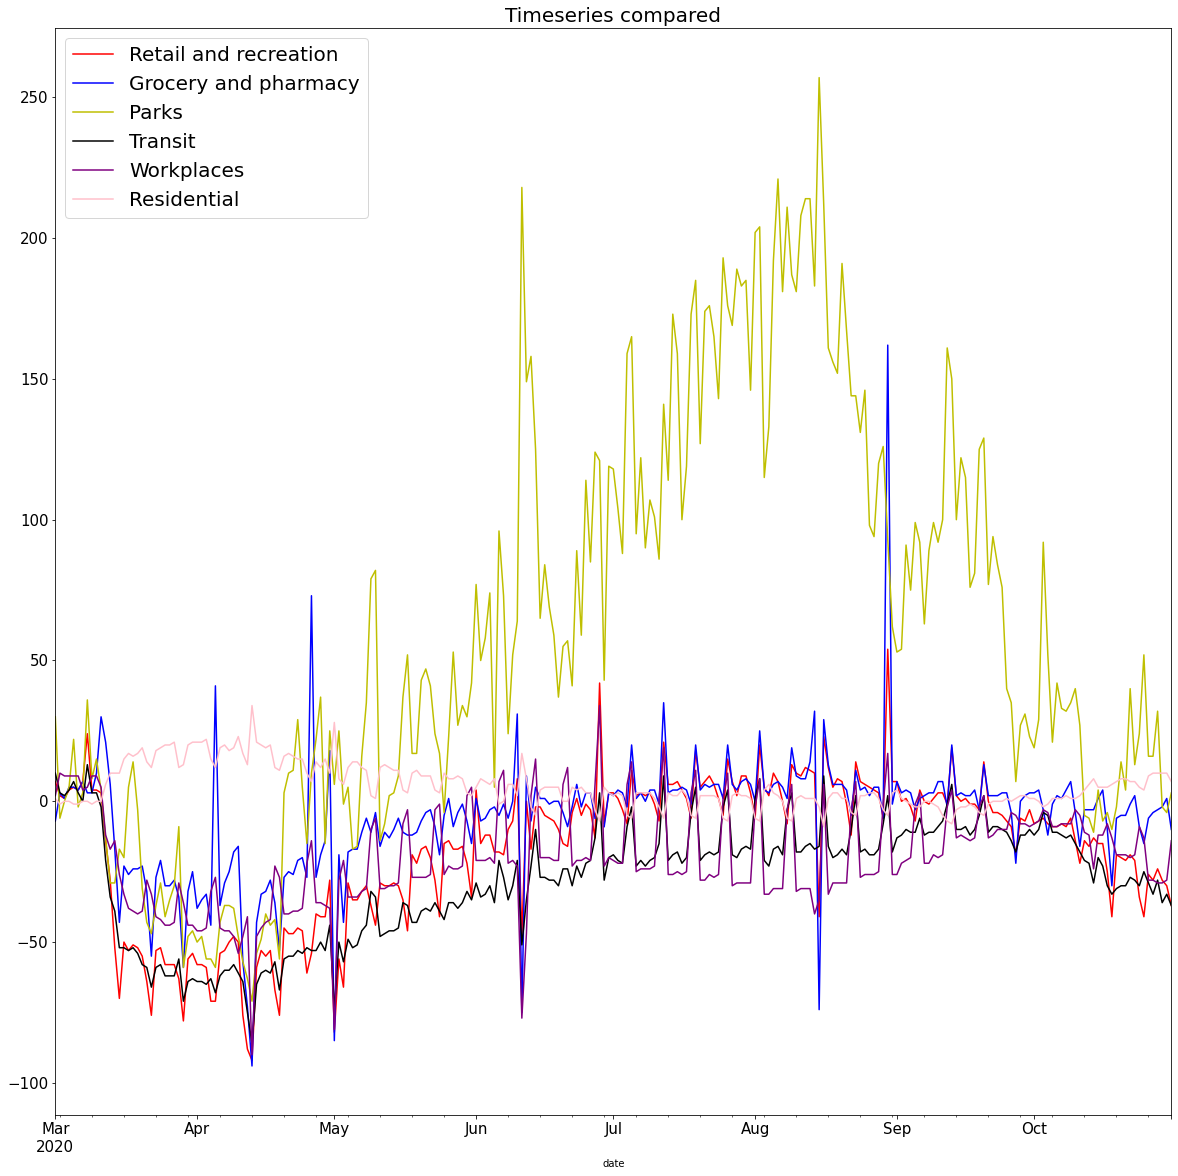

In [7]:
pol_retail_timeseries.plot(figsize=(20,20), color='r', label='Retail and recreation', fontsize=15)
pol_grocery_timeseries.plot(color='b', label='Grocery and pharmacy')
pol_parks_timeseries.plot(color='y', label='Parks')
pol_trainsit_timeseries.plot(color='black', label='Transit')
pol_workplaces_timeseries.plot(color='purple', label='Workplaces')
pol_residential_timeseries.plot(color='pink', label='Residential')

plt.title('Timeseries compared', fontsize=20)

plt.legend(loc="upper left", prop={'size': 20})

plt.subplots_adjust(hspace=0.3)

In [119]:
aus[aus.columns[aus.dtypes != np.object]] = aus[aus.columns[aus.dtypes != np.object]].abs()
fra[fra.columns[fra.dtypes != np.object]] = fra[fra.columns[fra.dtypes != np.object]].abs()
pol[pol.columns[pol.dtypes != np.object]] = pol[pol.columns[pol.dtypes != np.object]].abs()
#changes all dataframes to include only the DIFFERENCE (positive value) in percentage from baseline

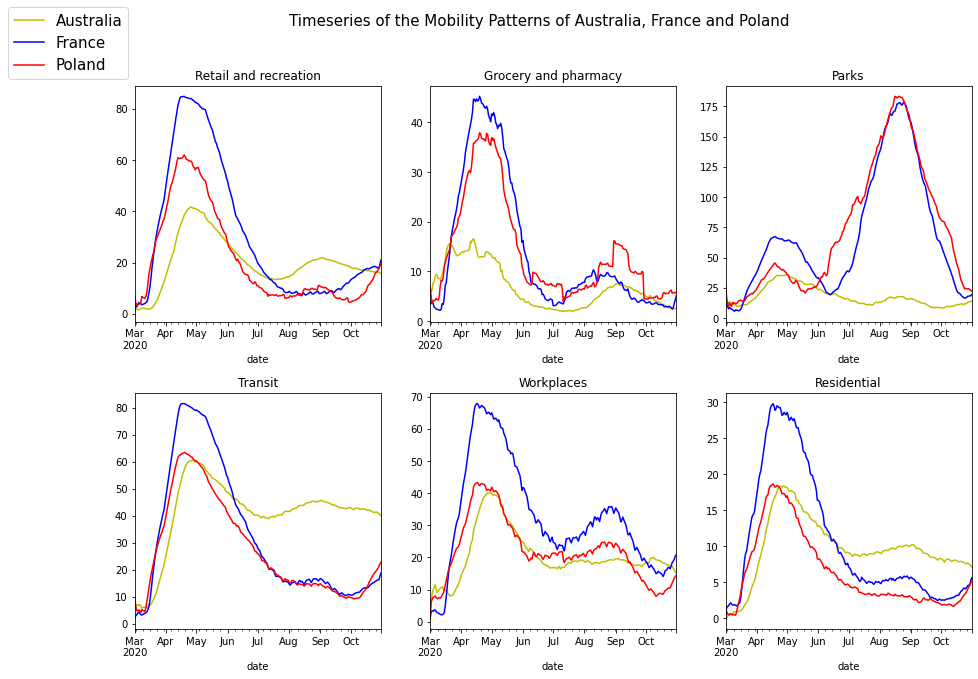

In [127]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

countries_timeseries = (aus, fra, pol)

colors = ('y', 'b', 'r')
labels = ('Australia', 'France', 'Poland')

z = 0

for country_timeseries in countries_timeseries:

    overall = country_timeseries.rolling(30, min_periods=1).mean()
    
    overall_retail_timeseries = pd.Series(overall['retail_and_recreation_percent_change_from_baseline'].values, index=aus.index)
    overall_grocery_timeseries = pd.Series(overall['grocery_and_pharmacy_percent_change_from_baseline'].values, index=aus.index)
    overall_parks_timeseries = pd.Series(overall['parks_percent_change_from_baseline'].values, index=aus.index)
    overall_transit_timeseries = pd.Series(overall['transit_stations_percent_change_from_baseline'].values, index=aus.index)
    overall_workplaces_timeseries = pd.Series(overall['workplaces_percent_change_from_baseline'].values, index=aus.index)
    overall_residential_timeseries = pd.Series(overall['residential_percent_change_from_baseline'].values, index=aus.index)
    

    overall_retail_timeseries.plot(ax=axes[0,0], color=colors[z])
    overall_grocery_timeseries.plot(ax=axes[0,1], color=colors[z])
    overall_parks_timeseries.plot(ax=axes[0,2], color=colors[z])
    overall_transit_timeseries.plot(ax=axes[1,0], color=colors[z])
    overall_workplaces_timeseries.plot(ax=axes[1,1], color=colors[z])
    overall_residential_timeseries.plot(ax=axes[1,2], color=colors[z])

    z=z+1


fig.suptitle('Timeseries of the Mobility Patterns of Australia, France and Poland', fontsize=15)
axes[0,0].set_title('Retail and recreation')
axes[0,1].set_title('Grocery and pharmacy')
axes[0,2].set_title('Parks')
axes[1,0].set_title('Transit')
axes[1,1].set_title('Workplaces')
axes[1,2].set_title('Residential')

plt.subplots_adjust(hspace=0.3)

handles, labels = fig.axes[0].get_legend_handles_labels()

labels=('Australia','France','Poland')

fig.legend(handles, labels, loc='upper left', prop={'size': 15})

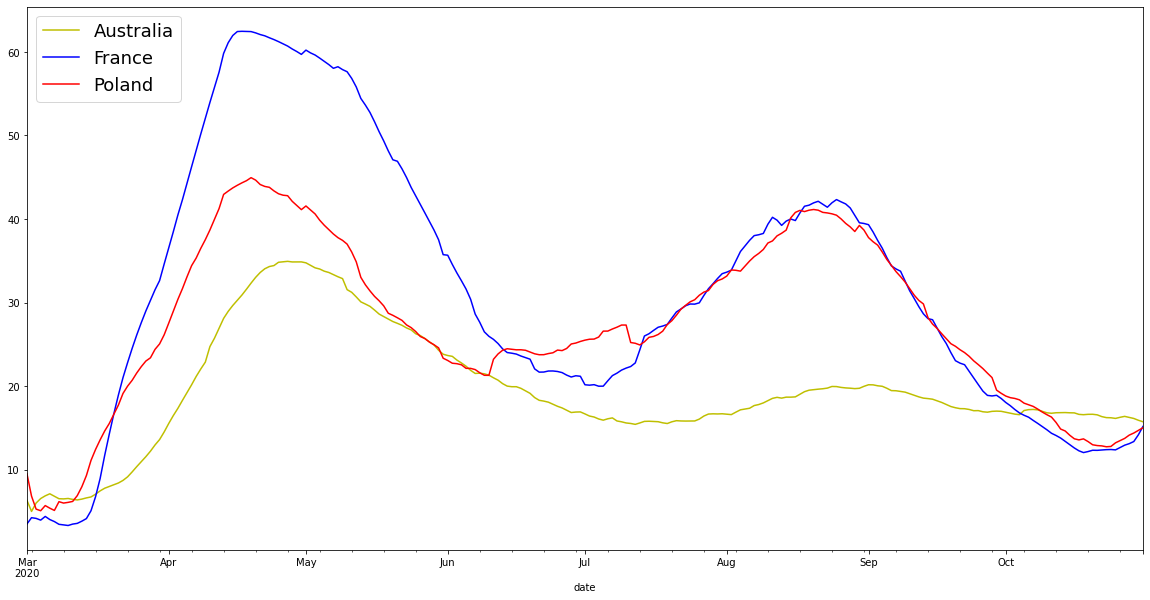

In [117]:
plt.figure(figsize=(20,10)) #figsize for plot

countries_timeseries = (aus, fra, pol)

colors = ('y', 'b', 'r')
labels = ('Australia', 'France', 'Poland')

z = 0

for country_timeseries in countries_timeseries:
    
    overall = country_timeseries.rolling(30, min_periods=1).mean()
    
    overall_retail_timeseries = pd.Series(overall['retail_and_recreation_percent_change_from_baseline'].values, index=aus.index)
    overall_grocery_timeseries = pd.Series(overall['grocery_and_pharmacy_percent_change_from_baseline'].values, index=aus.index)
    overall_parks_timeseries = pd.Series(overall['parks_percent_change_from_baseline'].values, index=aus.index)
    overall_transit_timeseries = pd.Series(overall['transit_stations_percent_change_from_baseline'].values, index=aus.index)
    overall_workplaces_timeseries = pd.Series(overall['workplaces_percent_change_from_baseline'].values, index=aus.index)
    overall_residential_timeseries = pd.Series(overall['residential_percent_change_from_baseline'].values, index=aus.index)
    
    
    dates = overall_retail_timeseries.index

    mean_timeseries = pd.Series([],dtype='float64')

    overall_retail_timeseries = overall_retail_timeseries.reset_index(drop=True)
    overall_grocery_timeseries = overall_grocery_timeseries.reset_index(drop=True)
    overall_parks_timeseries = overall_parks_timeseries.reset_index(drop=True)
    overall_transit_timeseries = overall_transit_timeseries.reset_index(drop=True)
    overall_workplaces_timeseries = overall_workplaces_timeseries.reset_index(drop=True)
    overall_residential_timeseries = overall_residential_timeseries.reset_index(drop=True)


    for y in overall_retail_timeseries.index:
        retail = overall_retail_timeseries.at[y]
        grocery = overall_grocery_timeseries.at[y]
        parks = overall_parks_timeseries.at[y]
        transit = overall_transit_timeseries.at[y]
        workplaces = overall_workplaces_timeseries.at[y]
        residential = overall_residential_timeseries.at[y]

        mean = (retail + grocery + parks + transit + workplaces + residential)/6

        mean_timeseries.at[y] = mean

    
    mean_timeseries.index = dates
    
    
    mean_timeseries.plot(color=colors[z])

    z=z+1

plt.legend(labels, loc='upper left', prop={'size': 18})